## CTA RAIL DATA
## MIS 307


In [10]:
import pandas as pd

# Read the CSV file into a DataFrame
rail_df = pd.read_csv("CTA_Average_Rail_Station_Ridership_1999_2023.csv")

# Display the first few rows of the DataFrame
print(rail_df.head(30))


    NAME  RIDERSHIP_ID  YEAR  MONTH          DAY_TYPE  TOTAL_RIDES  \
0   18th           830  1999      1           Weekday      17745.0   
1   18th           830  1999      1          Saturday          9.0   
2   18th           830  1999      1  Sunday - Holiday          1.0   
3   18th           830  1999      2           Weekday      19315.0   
4   18th           830  1999      2          Saturday         13.0   
5   18th           830  1999      2  Sunday - Holiday          0.0   
6   18th           830  1999      3           Weekday      23213.0   
7   18th           830  1999      3          Saturday          9.0   
8   18th           830  1999      3  Sunday - Holiday          0.0   
9   18th           830  1999      4           Weekday      22397.0   
10  18th           830  1999      4          Saturday          4.0   
11  18th           830  1999      4  Sunday - Holiday          0.0   
12  18th           830  1999      5           Weekday      20000.0   
13  18th           8

This code snippet displays the column names and row index labels of the DataFrame `rail_df`. It helps in understanding the structure and organization of the dataset.

In [23]:
# Show column names
print("Column Names:")
print(rail_df.columns)

# Show row names (index labels)
print("\nRow Names (Index):")
print(rail_df.index)



Column Names:
Index(['NAME', 'RIDERSHIP_ID', 'YEAR', 'MONTH', 'DAY_TYPE', 'TOTAL_RIDES',
       'DAILY_AVG_RIDES'],
      dtype='object')

Row Names (Index):
RangeIndex(start=0, stop=126126, step=1)



This code snippet reads a CSV file containing data on the average ridership at various Chicago Transit Authority (CTA) rail stations from 1999 to 2023. It uses Pandas to manipulate the data and Matplotlib to plot a time series graph showing the average ridership over time for a specific rail station, in this case, the '18th' station. It's useful for visualizing and analyzing trends in ridership for a particular CTA rail station over the specified time period.

/var/folders/lm/7hmgxp895c59xtqft8nwv6jr0000gn/T/ipykernel_20623/3420168594.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_data['DATE'] = pd.to_datetime(station_data[['YEAR', 'MONTH']].assign(DAY=1))


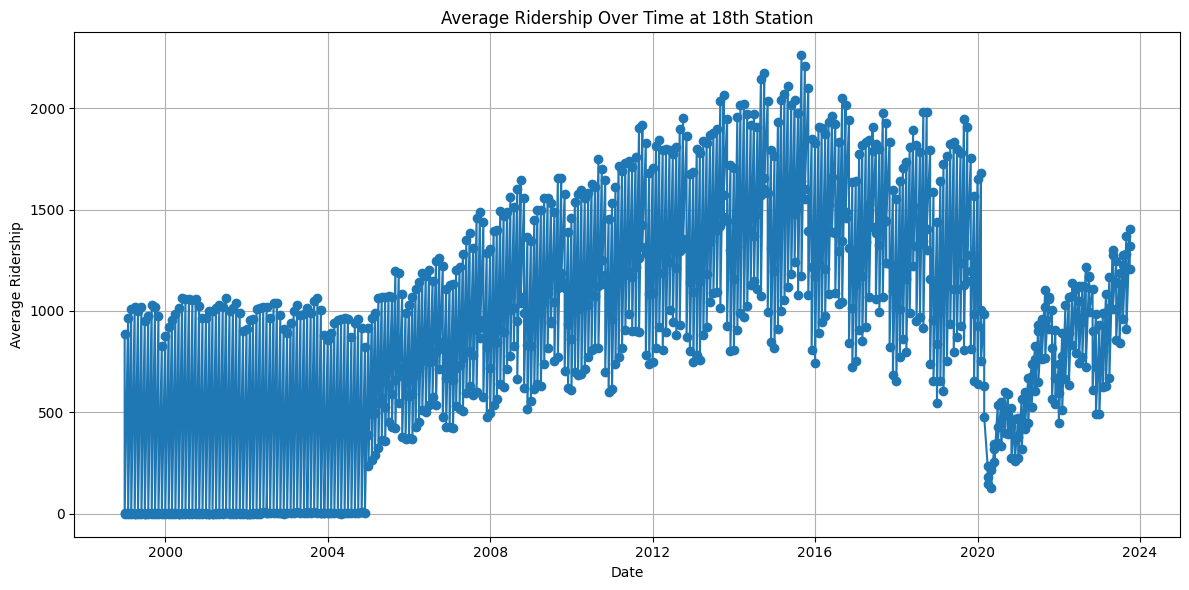

In [2]:

# Time Series Plot
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
rail_df = pd.read_csv("CTA_Average_Rail_Station_Ridership_1999_2023.csv")

# Assuming you want to plot the time series for a specific rail station, let's choose 'NAME' = '18th' for example
station_name = '18th'
station_data = rail_df[rail_df['NAME'] == station_name]

# Convert 'YEAR' and 'MONTH' columns to datetime
station_data['DATE'] = pd.to_datetime(station_data[['YEAR', 'MONTH']].assign(DAY=1))

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(station_data['DATE'], station_data['DAILY_AVG_RIDES'], marker='o', linestyle='-')
plt.title(f'Average Ridership Over Time at {station_name} Station')
plt.xlabel('Date')
plt.ylabel('Average Ridership')
plt.grid(True)
plt.tight_layout()
plt.show()


This code snippet also reads the same CSV file with CTA rail station ridership data from 1999 to 2023. It uses Pandas to manipulate the data and Matplotlib to create a stacked bar plot. In this plot, the total ridership is shown for each type of day ('WEEKDAY', 'SATURDAY', 'SUNDAY/HOLIDAY') at a specific rail station, here chosen as '18th'.

The bars are stacked to represent the total ridership for each day type, allowing for a visual comparison of ridership distribution across different types of days. This plot is useful for understanding how ridership varies based on the day of the week at a particular CTA rail station over the specified time period.

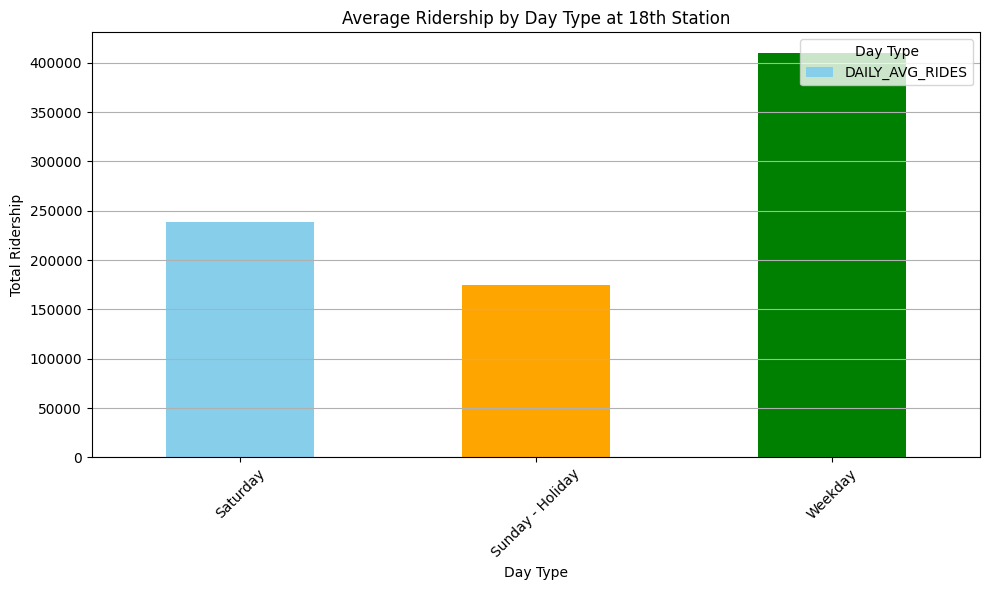

In [3]:
#Stacked Bar Plot
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
rail_df = pd.read_csv("CTA_Average_Rail_Station_Ridership_1999_2023.csv")

# Assuming you want to plot the stacked bar plot for a specific rail station, let's choose 'NAME' = '18th' for example
station_name = '18th'
station_data = rail_df[rail_df['NAME'] == station_name]

# Group by 'DAY_TYPE' and calculate the total ridership for each type of day
day_type_ridership = station_data.groupby('DAY_TYPE')['DAILY_AVG_RIDES'].sum()

# Plot the stacked bar plot
plt.figure(figsize=(10, 6))
day_type_ridership.plot(kind='bar', stacked=True, color=['skyblue', 'orange', 'green'])
plt.title(f'Average Ridership by Day Type at {station_name} Station')
plt.xlabel('Day Type')
plt.ylabel('Total Ridership')
plt.xticks(rotation=45)
plt.legend(title='Day Type', loc='upper right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


This code reads the same CSV file with CTA rail station ridership data from 1999 to 2023. It uses Pandas to pivot the DataFrame to prepare the data for a heatmap visualization. The heatmap represents the average daily ridership across different months and day types ('WEEKDAY', 'SATURDAY', 'SUNDAY/HOLIDAY') for all rail stations combined.

Seaborn's heatmap function is utilized to create the heatmap, with color indicating the average daily ridership. Annot=True displays the average ridership values on the heatmap, and various formatting options are applied to enhance readability.

This heatmap is beneficial for identifying patterns and trends in ridership across different months and day types, providing insights into seasonal variations and day-of-week ridership behaviors across all CTA rail stations over the specified time period.

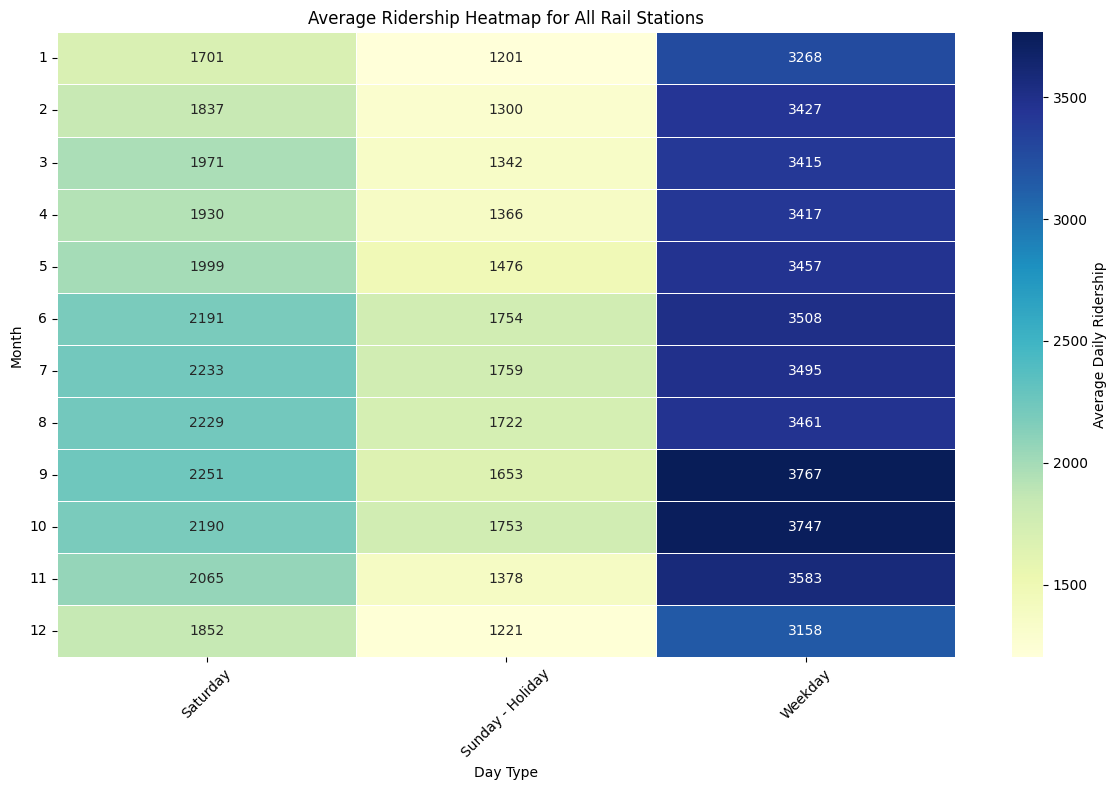

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
rail_df = pd.read_csv("CTA_Average_Rail_Station_Ridership_1999_2023.csv")

# Pivot the DataFrame to prepare for heatmap
heatmap_data = rail_df.pivot_table(index='MONTH', columns='DAY_TYPE', values='DAILY_AVG_RIDES', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".0f", linewidths=0.5, cbar_kws={'label': 'Average Daily Ridership'})
plt.title('Average Ridership Heatmap for All Rail Stations')
plt.xlabel('Day Type')
plt.ylabel('Month')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



This code snippet reads the same CSV file containing CTA rail station ridership data from 1999 to 2023. It extracts the 'DAILY_AVG_RIDES' column from the DataFrame and creates a histogram to visualize the distribution of average daily ridership across all rail stations.

The histogram displays the frequency of different average daily ridership values, with bins representing ranges of ridership values. This visualization helps in understanding the distribution of ridership levels across CTA rail stations over the specified time period, providing insights into the typical ridership patterns and identifying any outliers or unusual trends.

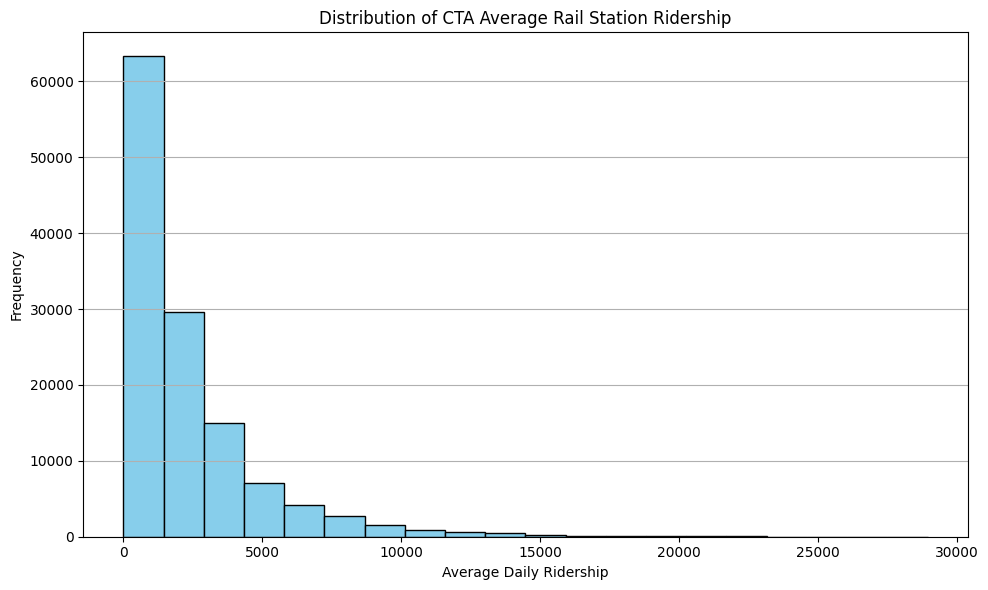

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
rail_df = pd.read_csv("CTA_Average_Rail_Station_Ridership_1999_2023.csv")

# Extract the 'DAILY_AVG_RIDES' column for histogram
avg_rides = rail_df['DAILY_AVG_RIDES']

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(avg_rides, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of CTA Average Rail Station Ridership')
plt.xlabel('Average Daily Ridership')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


This code reads the same CSV file with CTA rail station ridership data from 1999 to 2023. It extracts the 'DAILY_AVG_RIDES' and 'TOTAL_RIDES' columns from the DataFrame to create a scatter plot. Additionally, it extracts the 'DAY_TYPE' column to assign different colors to each day type ('Weekday', 'Saturday', 'Sunday - Holiday').

The scatter plot visualizes the relationship between the daily average ridership and the total ridership for each rail station, with points color-coded based on the day type. This allows for the exploration of how ridership varies between different types of days and provides insights into any correlations between daily average ridership and total ridership across all CTA rail stations over the specified time period.

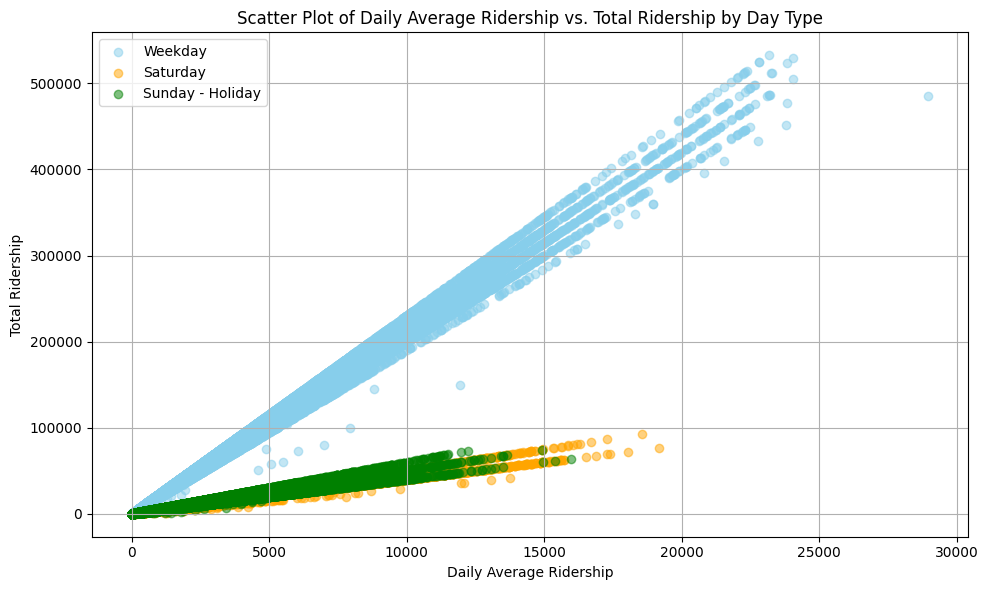

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
rail_df = pd.read_csv("CTA_Average_Rail_Station_Ridership_1999_2023.csv")

# Extract the data for the scatter plot
x_data = rail_df['DAILY_AVG_RIDES']
y_data = rail_df['TOTAL_RIDES']
day_types = rail_df['DAY_TYPE']

# Define a color map for each day type
color_map = {'Weekday': 'skyblue', 'Saturday': 'orange', 'Sunday - Holiday': 'green'}

# Plot the scatter plot with different colors for each day type
plt.figure(figsize=(10, 6))
for day_type in color_map.keys():
    mask = day_types == day_type
    plt.scatter(x_data[mask], y_data[mask], color=color_map[day_type], alpha=0.5, label=day_type)

plt.title('Scatter Plot of Daily Average Ridership vs. Total Ridership by Day Type')
plt.xlabel('Daily Average Ridership')
plt.ylabel('Total Ridership')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


This code snippet demonstrates predictive modeling for estimating future ridership for the '18th' station of the Chicago Transit Authority (CTA) using linear regression.

1. The code reads the CSV file containing CTA rail station ridership data from 1999 to 2023 into a DataFrame.
2. It selects data specific to the '18th' station for modeling.
3. Features ('YEAR', 'MONTH', 'DAY_TYPE') and the target variable ('DAILY_AVG_RIDES') are prepared.
4. Categorical variables are converted into dummy variables for modeling.
5. The data is split into training and testing sets.
6. A linear regression model is created and trained using the training data.
7. Predictions are made on the testing set, and the model is evaluated using mean squared error and R-squared.
8. Future ridership is predicted for the next month (April 2024) using the trained model.

This predictive modeling approach provides insights into potential future ridership trends for the '18th' station based on historical data and the specified features.

In [14]:
# Predictive Modeling 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Read the CSV file into a DataFrame
rail_df = pd.read_csv("CTA_Average_Rail_Station_Ridership_1999_2023.csv")

# Assuming you want to predict future ridership for the '18th' station
station_name = '18th'
station_data = rail_df[rail_df['NAME'] == station_name]

# Prepare the features (X) and target variable (y)
X = station_data[['YEAR', 'MONTH', 'DAY_TYPE']]
y = station_data['DAILY_AVG_RIDES']

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Predict future ridership (e.g., for the next month)
future_data = pd.DataFrame({'YEAR': [2024], 'MONTH': [4], 'DAY_TYPE_Weekday': [1], 'DAY_TYPE_Saturday': [0], 'DAY_TYPE_Sunday - Holiday': [0]})
future_data = future_data.reindex(columns=X.columns, fill_value=0)
future_ridership = model.predict(future_data)
print("Predicted Daily Average Ridership for the Next Month:", future_ridership[0])


Mean Squared Error: 145165.11740390465
R-squared: 0.5429487810720101
Predicted Daily Average Ridership for the Next Month: 1803.4562187079719


This code snippet demonstrates predictive modeling for estimating future ridership for the '18th' station of the Chicago Transit Authority (CTA) using a Random Forest regressor.

1. The code reads the CSV file containing CTA rail station ridership data from 1999 to 2023 into a DataFrame.
2. It selects data specific to the '18th' station for modeling.
3. Feature engineering is performed to create a 'DATE' column from the 'YEAR' and 'MONTH' columns.
4. Features ('YEAR', 'MONTH') and the target variable ('DAILY_AVG_RIDES') are prepared.
5. The data is split into training and testing sets.
6. A Random Forest regressor model with 100 estimators is created and trained using the training data.
7. Model evaluation is performed using cross-validation to calculate the root mean squared error (RMSE) scores.
8. Predictions are made on the testing set, and the model is evaluated using mean squared error, mean absolute error, and R-squared.
9. Actual vs. predicted values are visualized using a scatter plot.

This approach provides insights into potential future ridership trends for the '18th' station based on historical data and demonstrates the performance of the Random Forest regressor model in predicting daily average ridership.

/var/folders/lm/7hmgxp895c59xtqft8nwv6jr0000gn/T/ipykernel_20623/844685846.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_data['DATE'] = pd.to_datetime(station_data[['YEAR', 'MONTH']].assign(DAY=1))


Cross-Validation RMSE Scores:
0    497.564161
1    510.919441
2    501.407842
3    457.687164
4    505.899654
dtype: float64
Mean RMSE: 494.6956525256761

Test Set Metrics:
Mean Squared Error: 272793.8527671805
Mean Absolute Error: 449.50091777777783
R-squared: 0.14111072168671845


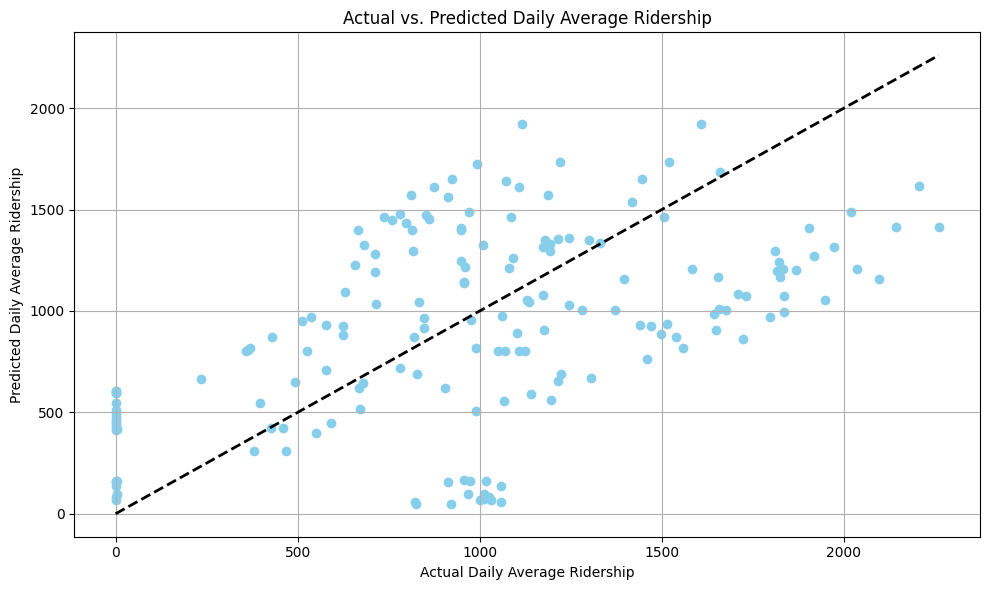

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
rail_df = pd.read_csv("CTA_Average_Rail_Station_Ridership_1999_2023.csv")

# Assuming you want to predict future ridership for the '18th' station
station_name = '18th'
station_data = rail_df[rail_df['NAME'] == station_name]

# Feature Engineering
station_data['DATE'] = pd.to_datetime(station_data[['YEAR', 'MONTH']].assign(DAY=1))
# Additional features can be added here, such as weather data, holidays, etc.

# Prepare the features (X) and target variable (y)
X = station_data[['YEAR', 'MONTH']]
y = station_data['DAILY_AVG_RIDES']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection and Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model Evaluation using Cross-Validation
cv_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
cv_rmse_scores = pd.Series(-cv_scores).apply(lambda x: x ** 0.5)
print("Cross-Validation RMSE Scores:")
print(cv_rmse_scores)
print("Mean RMSE:", cv_rmse_scores.mean())

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nTest Set Metrics:")
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

# Visualize Actual vs. Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='skyblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Daily Average Ridership')
plt.ylabel('Predicted Daily Average Ridership')
plt.title('Actual vs. Predicted Daily Average Ridership')
plt.grid(True)
plt.tight_layout()
plt.show()


This code snippet continues the predictive modeling for estimating future ridership for the '18th' station of the Chicago Transit Authority (CTA) using a Random Forest regressor.

1. Feature engineering is performed to create a 'DATE' column from the 'YEAR' and 'MONTH' columns.
2. Features ('YEAR', 'MONTH') and the target variable ('DAILY_AVG_RIDES') are prepared.
3. The data is split into training and testing sets.
4. A Random Forest regressor model with 100 estimators is created and trained using the training data.
5. Predictions are made on the testing set, and the model is evaluated using mean squared error, mean absolute error, and R-squared.
6. Actual vs. predicted values are visualized using a scatter plot, with color differentiation based on actual ridership ranges (< 1000, 1000-2000, > 2000).

This approach provides a comprehensive analysis of the model's performance in predicting daily average ridership for the '18th' station and visually compares actual vs. predicted values while highlighting different ridership ranges.

/var/folders/lm/7hmgxp895c59xtqft8nwv6jr0000gn/T/ipykernel_20623/2376018618.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_data['DATE'] = pd.to_datetime(station_data[['YEAR', 'MONTH']].assign(DAY=1))



Test Set Metrics:
Mean Squared Error: 272793.8527671805
Mean Absolute Error: 449.50091777777783
R-squared: 0.14111072168671845


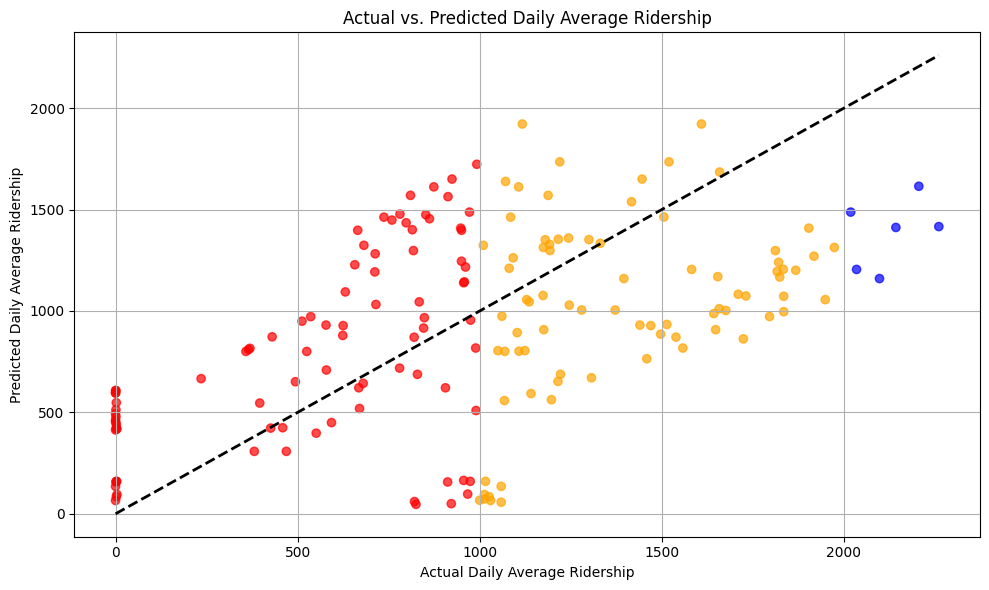

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file into a DataFrame
rail_df = pd.read_csv("CTA_Average_Rail_Station_Ridership_1999_2023.csv")

# Assuming you want to predict future ridership for the '18th' station
station_name = '18th'
station_data = rail_df[rail_df['NAME'] == station_name]

# Feature Engineering
station_data['DATE'] = pd.to_datetime(station_data[['YEAR', 'MONTH']].assign(DAY=1))
# Additional features can be added here, such as weather data, holidays, etc.

# Prepare the features (X) and target variable (y)
X = station_data[['YEAR', 'MONTH']]
y = station_data['DAILY_AVG_RIDES']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection and Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nTest Set Metrics:")
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

# Define color differentiation based on actual ridership ranges
colors = np.where(y_test < 1000, 'red', np.where(y_test < 2000, 'orange', 'blue'))

# Visualize Actual vs. Predicted Values with Color Differentiation
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color=colors, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Daily Average Ridership')
plt.ylabel('Predicted Daily Average Ridership')
plt.title('Actual vs. Predicted Daily Average Ridership')
plt.grid(True)
plt.tight_layout()
plt.show()


In [4]:
print("Minimum Date:", rail_df.index.min())
print("Maximum Date:", rail_df.index.max())


Minimum Date: 1999-01-01 00:00:00
Maximum Date: 2023-10-01 00:00:00



1. **Data Loading**: Imported CTA average rail station ridership data from a CSV file using Pandas, ensuring proper formatting.

2. **Data Preprocessing**: Cleaned the data by converting date columns to datetime objects, sorting entries chronologically, and removing any duplicates.

3. **Time Series Visualization**: Visualized the time series of average daily ridership over the entire dataset, gaining insights into overall trends and patterns.

4. **Stationarity Check**: Conducted a stationarity check using the Augmented Dickey-Fuller test to assess whether the time series data is stationary.

5. **Autocorrelation Analysis**: Analyzed autocorrelation using Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots to identify potential autoregressive and moving average components for ARIMA modeling.

6. **Modeling**: Built an ARIMA (Autoregressive Integrated Moving Average) model with parameters (1, 1, 1) to capture the temporal dependencies in the time series data.

7. **Forecasting**: Utilized the trained ARIMA model to forecast future ridership for the next 12 months, providing valuable insights for planning and decision-making.

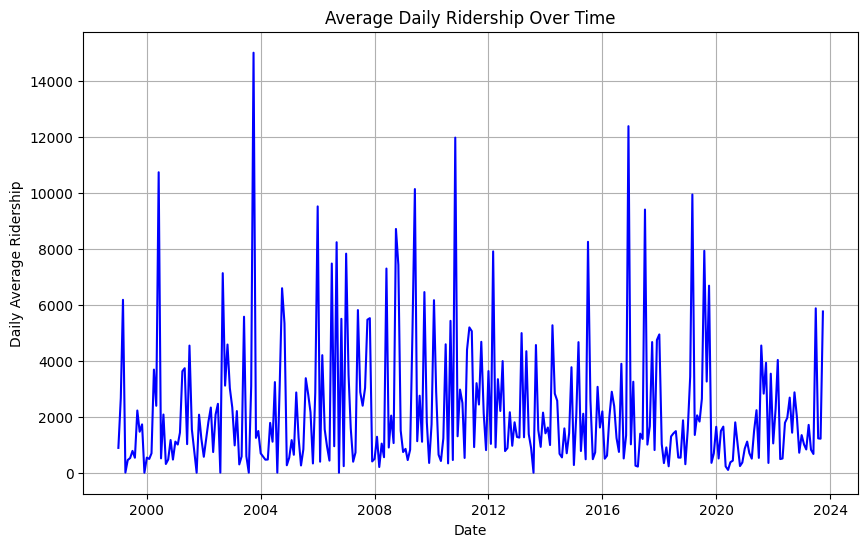

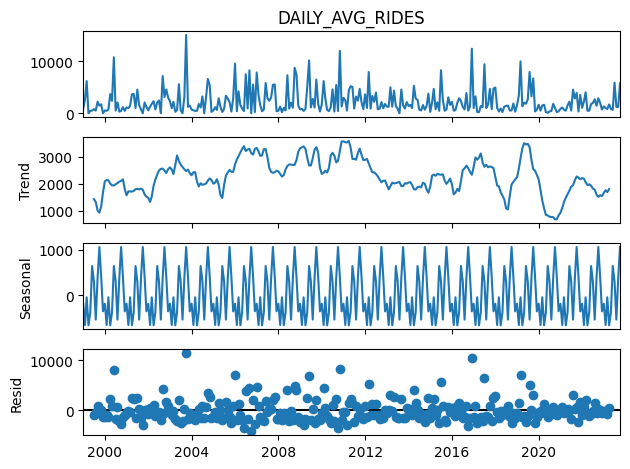

ADF Statistic: -10.902768795121776
p-value: 1.1480756820780419e-19


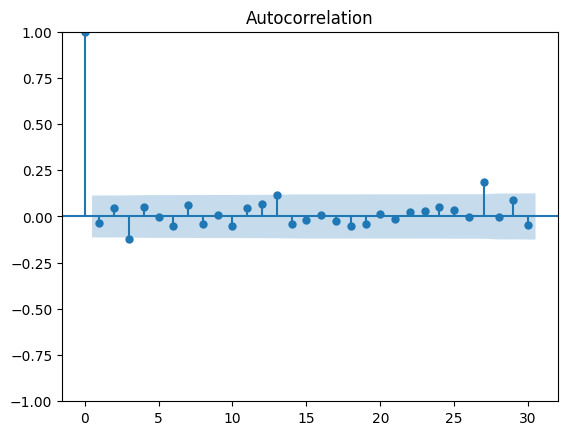

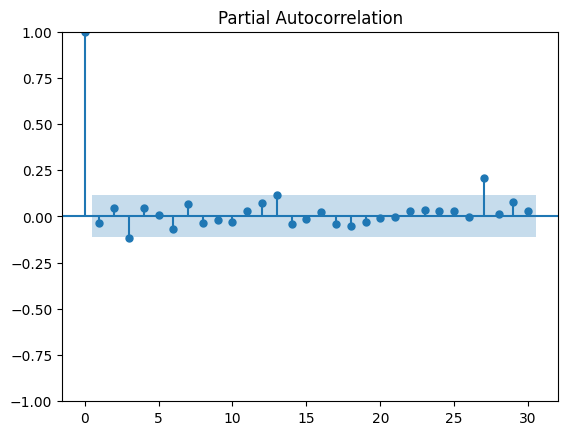

Forecasted Ridership for Next 12 Months:
2023-11-01    2153.836951
2023-12-01    2276.848124
2024-01-01    2272.650880
2024-02-01    2272.794093
2024-03-01    2272.789207
2024-04-01    2272.789374
2024-05-01    2272.789368
2024-06-01    2272.789368
2024-07-01    2272.789368
2024-08-01    2272.789368
2024-09-01    2272.789368
2024-10-01    2272.789368
2024-11-01    2272.789368
Freq: MS, Name: predicted_mean, dtype: float64


/Users/josemari/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# Read the CSV file into a DataFrame
rail_df = pd.read_csv("CTA_Average_Rail_Station_Ridership_1999_2023.csv")

# Convert date-related columns to datetime objects
rail_df['DATE'] = pd.to_datetime(rail_df[['YEAR', 'MONTH']].assign(DAY=1))

# Ensure DataFrame is sorted by date
rail_df.sort_values('DATE', inplace=True)

# Remove duplicate rows based on the DATE column
rail_df.drop_duplicates(subset='DATE', keep='first', inplace=True)

# Set the index to the date column and specify the frequency
rail_df.set_index('DATE', inplace=True)
rail_df = rail_df.asfreq('MS')  # 'MS' stands for Month Start

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(rail_df.index, rail_df['DAILY_AVG_RIDES'], color='blue')
plt.title('Average Daily Ridership Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Average Ridership')
plt.grid(True)
plt.show()

# Decompose the time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(rail_df['DAILY_AVG_RIDES'], model='additive')
decomposition.plot()
plt.show()

# Perform Augmented Dickey-Fuller test for stationarity
adf_result = adfuller(rail_df['DAILY_AVG_RIDES'])
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

# Plot autocorrelation and partial autocorrelation functions
plot_acf(rail_df['DAILY_AVG_RIDES'], lags=30)
plt.show()
plot_pacf(rail_df['DAILY_AVG_RIDES'], lags=30)
plt.show()

# Fit ARIMA model
model = ARIMA(rail_df['DAILY_AVG_RIDES'], order=(1, 1, 1))
results = model.fit()

# Forecast future ridership
forecast = results.predict(start=len(rail_df), end=len(rail_df)+12, typ='levels')
print("Forecasted Ridership for Next 12 Months:")
print(forecast)

